<a href="https://colab.research.google.com/github/simi12345/Handala_Portfolio/blob/main/Copy_of_TutorialSNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library untukmengolah data dalam format JSON
import json
import csv
import sys
import tweepy


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Load data tweet untukmengambilpasangan id pengguna yang berinteraksidenganmembalas tweet
tws=[]
for l in open('/content/gdrive/MyDrive/PRAKTIKUM_AMSD/Data_Tweets_10.json'):
  tw = json.loads(l)
  if(tw["in_reply_to_user_id"] is not None):
    tws.append([tw["user"]["id"],tw["in_reply_to_user_id"], tw["user"]["screen_name"],tw["in_reply_to_screen_name"]])


In [ ]:
len(tws)

923

In [ ]:
#menggabungkan id pengguna yang berinteraksi ke dalam sebuah list
nodes=[]
users=[]
for t in tws:
  if(t[0] not in nodes):
    nodes.append(t[0])
    users.append([t[0],t[2]])
  if(t[1] not in nodes):
    nodes.append(t[1])
    users.append([t[1],t[3]])


In [ ]:
#menyiapkan file csv yang akan di gunakan untuk menampung data nodes
csvNode = open('/content/gdrive/MyDrive/PRAKTIKUM_AMSD/komisaristelkom-node-list.csv', 'a', newline='')
nodeWriter = csv.writer(csvNode)

In [ ]:
#menulis data user kedalam file csv
for user in users:
  nodeWriter.writerow(user)
csvNode.close()

In [ ]:
#menyiapkan file csv untuk menampung data edge
csvEdge = open('/content/gdrive/MyDrive/PRAKTIKUM_AMSD/komisaristelkom-edge-list.csv', 'a', newline='')
edgeWriter = csv.writer(csvEdge)


In [ ]:
#menulis data egekedalam file csv
for t in tws:
  edgeWriter.writerow(t)
csvEdge.close()


In [ ]:
import networkx as nx
from operator import itemgetter
import csv
from networkx.algorithms import community

In [ ]:
#membaca file node list
with open('/content/gdrive/MyDrive/PRAKTIKUM_AMSD/komisaristelkom-node-list.csv', 'r') as nodecsv: # Buka file csv
  nodereader = csv.reader(nodecsv) # membaca file csv
  nodes = [n for n in nodereader if len(n)>0] #memastikan hanya baris yang adaisinya yang diambil

  node_ids = [n[0] for n in nodes] # menyiapkan list yang berisi id pengguna


In [ ]:
#membaca file edge list
with open('/content/gdrive/MyDrive/PRAKTIKUM_AMSD/komisaristelkom-edge-list.csv', 'r') as edgecsv: # buka file csv
  edgereader = csv.reader(edgecsv) # membaca file csv
  rows = [[row[0],row[1]] for row in edgereader if len(row)>0] #memastikan hanya baris yang adaisinya yang diambil
  edges =[tuple(e) for e in rows]


In [ ]:
len(edges)

923

In [ ]:
G = nx.DiGraph() #membuatobjek graph
G.add_nodes_from(node_ids) #menambahkan node kedalam graph
G.add_edges_from(edges) #menambahkan edge kedalam graph

In [ ]:
#membuat dictionary untuk user name twitter
screen_name_dict = {}
for node in nodes:
  screen_name_dict[node[0]] = node[1]


In [ ]:
#menambahkan attribute kedalam graph node
nx.set_node_attributes(G, screen_name_dict, 'nama_twitter')

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1096
Number of edges: 888
Average in degree:   0.8102
Average out degree:   0.8102


In [ ]:
#menghitung
indegree_dict = dict(G.in_degree())
outdegree_dict = dict(G.out_degree())

#menyimpankedalam attribute
nx.set_node_attributes(G, indegree_dict, 'indegree')
nx.set_node_attributes(G, outdegree_dict, 'outdegree')


In [ ]:
sorted_indegree = sorted(indegree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by indegree centrality:")
for d in sorted_indegree[:20]:
    print(d[0],"|",G.nodes[d[0]]['nama_twitter'],"|", d[1])


Top 20 nodes by indegree centrality:
1117990249806721024 | msaid_didu | 56
4780649298 | Dennysiregar7 | 37
69183155 | detikcom | 36
17128975 | CNNIndonesia | 35
3319260420 | geloraco | 17
829366551446818816 | asumsico | 12
18129942 | tempodotco | 11
41730943 | VIVAcoid | 10
27839691 | AbdeeNegara | 10
1266163382807224320 | FerdinandHaean3 | 9
23343960 | kompascom | 9
30201110 | alisyarief | 8
143698155 | ditamoechtar_ | 8
1239754822707904513 | BossTemlen | 8
3171665917 | heeburans | 8
1289954556411969537 | Ndons_Back | 7
1242374351078354944 | kafiradikalis | 7
243880064 | NovalAssegaf | 7
1248803440710406145 | dapitnih | 6
1231495733523566592 | txtdrpemerintah | 6


In [ ]:
sorted_outdegree = sorted(outdegree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by outdegree centrality:")
for d in sorted_outdegree[:20]:
    print(d[0],"|",G.nodes[d[0]]['nama_twitter'],"|", d[1])


Top 20 nodes by outdegree centrality:
307790713 | rainrainb0w | 87
1319907631188770817 | Budayaindonesi8 | 9
234610078 | handre_81 | 8
1375139356793466887 | SMoempoeni | 5
1354888390253056001 | KampretLiz | 5
1335732349070241792 | MelfryH | 4
891675935887339520 | indrasugiarto19 | 4
1254364681805807616 | LawanC19 | 3
1180244011870613506 | PembelaDemiNKRI | 3
882052290303082498 | INDOTEKH | 3
324179296 | wahyudhie3 | 3
3049221878 | Gino_vaneli | 3
42938215 | enjumpz | 3
1205929509184106496 | MasihHidupAku | 3
1109669267639697408 | AiraAfniAmalia | 3
634159957 | sayfull46 | 3
435197649 | HayabusaWarrior | 2
808838705192415232 | yakobus81406404 | 2
1570474686 | monot0ne | 2
1353449413885087744 | Djoked2 | 2


In [ ]:
betweenness_dict = nx.betweenness_centrality(G)

nx.set_node_attributes(G, betweenness_dict, 'betweenness')


In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweeness centrality:")
for d in sorted_betweenness[:20]:
    print(d[0],"|",G.nodes[d[0]]['nama_twitter'],"|", d[1])


Top 20 nodes by betweeness centrality:
1239754822707904513 | BossTemlen | 6.678186538445485e-06
1289954556411969537 | Ndons_Back | 5.8434132211398e-06
1241100157870944256 | FKadrun | 2.504319951917057e-06
1383808773102264323 | DeddyKusdedi3 | 1.6695466346113713e-06
1353449413885087744 | Djoked2 | 1.6695466346113713e-06
1236300856254853120 | RamdaniGuruh | 8.347733173056856e-07
100902049 | maulana050317 | 8.347733173056856e-07
1371135022871183365 | AdityaChristy2 | 8.347733173056856e-07
859359474 | JhonniSinaga20 | 8.347733173056856e-07
1211550743469019137 | KAPITANBESAR | 8.347733173056856e-07
1224642373457600513 | MDjoelies | 8.347733173056856e-07
1327577862325428225 | Novifauzan2 | 8.347733173056856e-07
1312514755 | DonAdam68 | 8.347733173056856e-07
1374357956108685317 | presiden_sarden | 8.347733173056856e-07
453795871 | dityaprtma | 8.347733173056856e-07
1379044492464943104 | HibisOdnielSabd | 8.347733173056856e-07
77665660 | donhoki | 8.347733173056856e-07
1375379220264710147 | ja

In [ ]:
#community detection
komunitas = community.girvan_newman(G)
next_komunitas = next(komunitas)

In [ ]:
ls_kom = sorted(map(sorted, next_komunitas))
len(ls_kom)

283

In [ ]:
#link prediction dengan jaccard coefficient
jc_linkpreds = nx.jaccard_coefficient(G.to_undirected())
links = [((u, v), p) for u, v, p in jc_linkpreds if(p>0.7)]

In [ ]:
print(links[:10])

[(('99281239', '106966168'), 1.0), (('1388213788390817794', '1318890301310652417'), 1.0), (('1388213788390817794', '95552207'), 1.0), (('1388213788390817794', '1369934605273374720'), 1.0), (('1388213788390817794', '3699125119'), 1.0), (('1388213788390817794', '1364541919984947200'), 1.0), (('1388213788390817794', '1343563920531804166'), 1.0), (('1147691814712823809', '1166222657471139841'), 1.0), (('1147691814712823809', '1169244228720807938'), 1.0), (('1147691814712823809', '70606602'), 1.0)]


In [ ]:
#link prediction dengan adamic adar index
aa_linkpreds = nx.adamic_adar_index(G.to_undirected())
links2 = [((u, v), p) for u, v, p in aa_linkpreds if(p>0.7)]

In [ ]:
print(links2[:10])

[(('99281239', '307790713'), 0.9102392266268373), (('99281239', '106966168'), 0.9102392266268373), (('2359120716', '791235291193352192'), 0.9102392266268373), (('2359120716', '1133199329487757312'), 0.9102392266268373), (('1383808773102264323', '307790713'), 2.352934267515801), (('1383808773102264323', '1340053091094208512'), 0.9102392266268373), (('1374357956108685317', '1180541549643304960'), 0.7213475204444817), (('1374357956108685317', '948189880714117121'), 0.7213475204444817), (('1054287747429486593', '567132989'), 1.4426950408889634), (('70614917', '307790713'), 1.4426950408889634)]


In [ ]:
H = G.subgraph(ls_kom[0])

In [ ]:
#Visualisasi graph
#import komponen matplotlib
from matplotlib import pyplot as plt


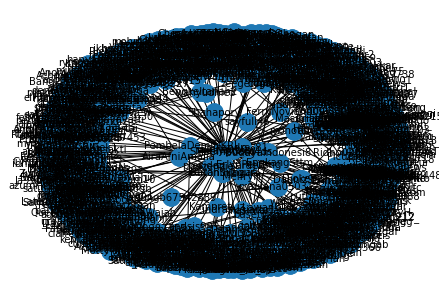

In [ ]:
#visualisasi graph dengan matplotlib
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_sizes = []
labels = []
nodeList = G.nodes

nx.draw_networkx_nodes(G, pos)
node_labels = nx.get_node_attributes(G,'nama_twitter')
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=10)

plt.savefig('this.png')
plt.show()


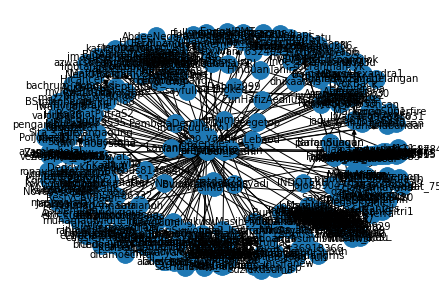

In [ ]:
#visualisasi subgraph dengan matplotlib
pos = nx.spring_layout(H)
nx.draw(H, pos)
node_sizes = []
labels = []
nodeList = H.nodes

nx.draw_networkx_nodes(H, pos)
node_labels = nx.get_node_attributes(H,'nama_twitter')
nx.draw_networkx_labels(H, pos, labels = node_labels, font_size=10)

plt.savefig('this.png')
plt.show()


In [ ]:
#export graph
nx.write_gexf(G, 'komisaris-telkom.gexf')